**Section 3.2: Data Collection**  
235 1-minute sequences  
camera + 2 radars, 10 fps  --> one sequence such as `single_1` has 600 frames

**Preprocessing**  
Steps:
1. Store the dataset in `preprocessing/raw_data/...`
2. Run `process_iwr1843.py` (pretty slow on my own laptop...)
3. Preprocessed data is stored in `data/HuPR/...`

**Dataset Statistics:**  
Actions: Static actions, standing and waving hands, and walking with waving hands  
Participants: 6  
Frames: 141k [1]  


[1]: mmwave point clouds + keypoints, TI IWR1843 mmWave radar

[1] Cui, Han, et al. "MiliPoint: A Point Cloud Dataset for mmWave Radar." Advances in Neural Information Processing Systems 36 (2024).

**Problems:**  
- Visualization does not work  
- They zero-pad the shape, maybe this is to match network setups and dimensions
- They average the elevation dimention before inputting into the networks, maybe to match 3D convolution layers  
- How to normalize 
- How to tokenize ADC values  
     
Questions:
1. the magnitude scale
    

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

### Show one sample in `single_1` horizontal

#### Range-Doppler map

Preprocessed data shape:  (16, 64, 64, 8)


Text(0, 0.5, 'Doppler')

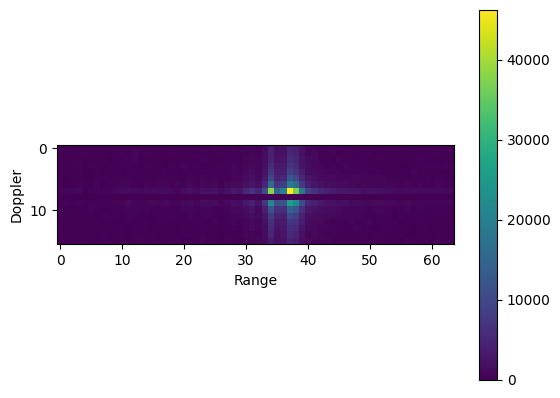

In [4]:
i = 1
# for i in range(500):
data = np.load('data/HuPR/single_1/hori/0000' + f'{i:05d}' + '.npy')
print('Preprocessed data shape: ', data.shape) # (16, 64, 64, 8) Doppler, Range, Azimuth, Elevation

RD = np.average(data, axis=3)
RD = np.average(RD, axis=2) 

# plt.imshow(10*np.log10(np.abs(RD)))
plt.imshow(np.abs(RD))
plt.colorbar()
plt.xlabel('Range')
plt.ylabel('Doppler')

The zero values around zero velocity is because of clutter removal (removing static objects detected from the radar data)

This image matches examples in the paper: 

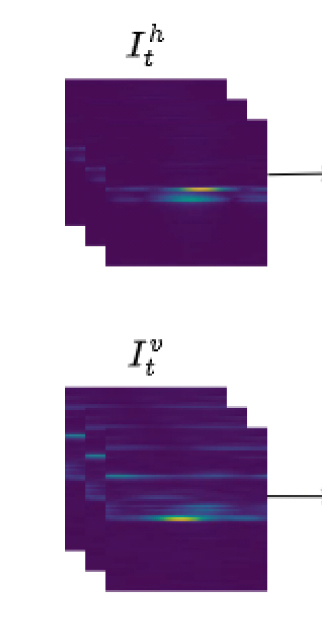

In [11]:
np.max(RD)

(4909.913777535536-5582.857634838972j)

#### Azimuth-Elevation

Text(0.5, 0, 'Azimuth')

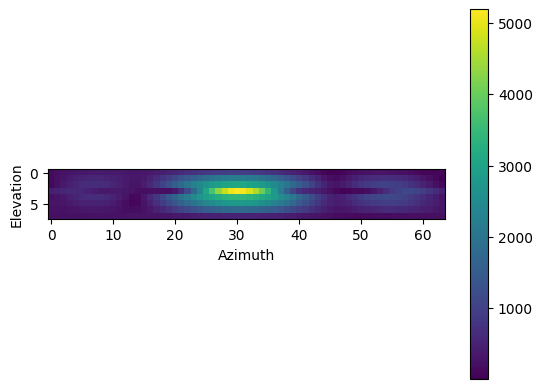

In [6]:
AE = np.average(data, axis=0)
AE = np.average(AE, axis=0) 

# plt.imshow(10*np.log10(np.abs(RD)))
plt.imshow(np.transpose(np.abs(AE)))
plt.colorbar()
plt.ylabel('Elevation')
plt.xlabel('Azimuth')

### Show one sample in `single_1` Vertical

(16, 64, 64, 8)


Text(0, 0.5, 'Doppler')

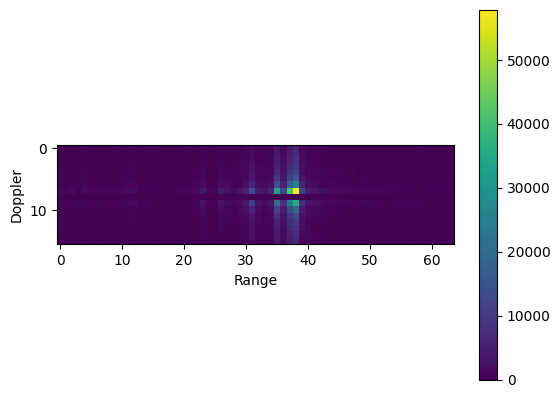

In [7]:

# for i in range(500):
data = np.load('data/HuPR/single_1/vert/0000' + f'{i:05d}' + '.npy')
print(data.shape) # (16, 64, 64, 8) Doppler, Range, Azimuth, Elevation

RD = np.average(data, axis=3)
RD = np.average(RD, axis=2) 

# plt.imshow(10*np.log10(np.abs(RD)))
plt.imshow(np.abs(RD))
plt.colorbar()
plt.xlabel('Range')
plt.ylabel('Doppler')

Text(0.5, 0, 'Azimuth')

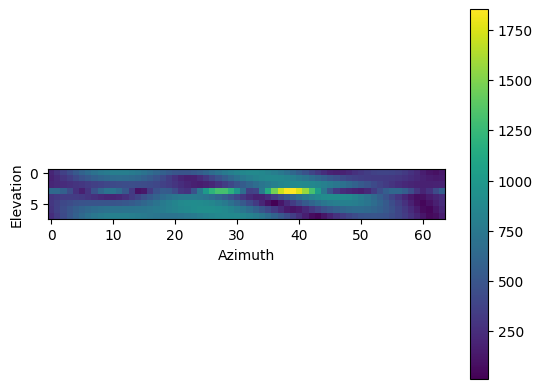

In [8]:
AE = np.average(data, axis=0)
AE = np.average(AE, axis=0) 

# plt.imshow(10*np.log10(np.abs(RD)))
plt.imshow(np.transpose(np.abs(AE)))
plt.colorbar()
plt.ylabel('Elevation')
plt.xlabel('Azimuth')


#### Saved ADC values

ADC data shape:  (115200, 256)


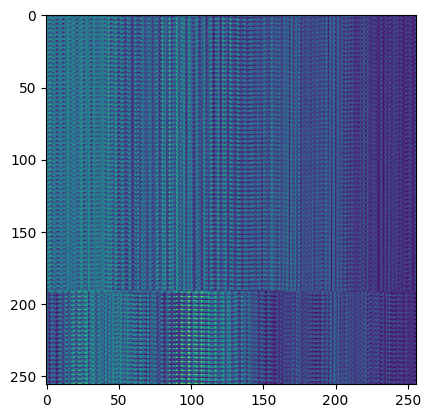

In [13]:
# The `ADC.npy` is converted from single_1 preprocessed ADC data
ADC = np.load('ADC.npy')  
ADC = np.mean(ADC, 0)
print('ADC data shape: ', ADC.shape)
plt.imshow(np.abs(ADC[:256,:]))